<a href="https://colab.research.google.com/github/Kochristof/Python-Data-Science/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [39]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
from sklearn.model_selection import KFold
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [ ]:
from sklearn.datasets import load_iris
pd.set_option('expand_frame_repr', False)

# Load the Iris dataset
iris = load_iris()

# Combine the data into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = iris.target
print(f"Our dataset has {iris_df.shape[0]} rows and {iris_df.shape[1]} columns. \n")

print (iris_df.head(10))

Our dataset has 150 rows and 5 columns. 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0
5                5.4               3.9                1.7               0.4       0
6                4.6               3.4                1.4               0.3       0
7                5.0               3.4                1.5               0.2       0
8                4.4               2.9                1.4               0.2       0
9                4.9               3.1                1.5               0.1       0


In [ ]:
X = iris_df.drop('target', axis=1)  # Features
y = iris_df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train:\n\n {X_train.head(5)} \n\n")
print(f"X_test:\n\n {X_test.head(5)}")

X_train:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2 


X_test:

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4


In [ ]:
color_red, color_reset = "\033[91m", "\033[0m"

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate through the k splits
for fold_num, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold_num+1}:\n")
    print(f"{color_red}Train Index:{color_reset} \n{train_index}\n")
    print(f"{color_red}Test Index:{color_reset} \n{test_index}\n")

Fold 1:

Train Index: 
[  1   2   3   5   6   7   8  13  14  16  17  19  20  21  23  25  27  28
  29  32  33  34  35  37  38  39  41  43  46  48  49  50  51  52  54  57
  58  59  60  61  63  66  67  68  69  71  72  74  75  77  79  80  81  82
  83  84  85  86  87  90  92  93  94  95  98  99 100 101 102 103 105 106
 108 111 112 113 115 116 117 119]

Test Index: 
[  0   4   9  10  11  12  15  18  22  24  26  30  31  36  40  42  44  45
  47  53  55  56  62  64  65  70  73  76  78  88  89  91  96  97 104 107
 109 110 114 118]

Fold 2:

Train Index: 
[  0   1   2   4   9  10  11  12  14  15  18  20  21  22  23  24  26  29
  30  31  32  36  37  40  41  42  44  45  47  48  51  52  53  55  56  57
  58  59  60  61  62  63  64  65  70  71  73  74  75  76  78  79  81  82
  86  87  88  89  91  92  93  96  97  99 101 102 103 104 105 106 107 108
 109 110 112 114 115 116 118 119]

Test Index: 
[  3   5   6   7   8  13  16  17  19  25  27  28  33  34  35  38  39  43
  46  49  50  54  66  67  68  69  72

In [ ]:
train_data = pd.read_csv("https://storage.googleapis.com/courses_data/Machine%20Learning%20Titanic/train.csv")
test_data = pd.read_csv("https://storage.googleapis.com/courses_data/Machine%20Learning%20Titanic/test.csv")

print(train_data.info())
print("\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [ ]:
"""
First, let's completely remove the 'Cabin' column,
which has quite limited information,
and the missing values outnumber the existing ones.
"""

train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

print(train_data.columns, "\n", test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object') 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
"""
Next, for the 'Age' column, we will follow the following approach.
We will find the mean age of women and men and fill in the missing values accordingly.
This can be done very easily with the following lines of code.
"""

mean_age_by_sex = train_data.groupby('Sex')['Age'].mean()
print(f"The mean values for each group are:\n{mean_age_by_sex}\n\n")

train_data["Age"] = train_data["Age"].fillna(train_data["Sex"].map(mean_age_by_sex))
train_data["Age"] = [int(x) for x in train_data["Age"]]

test_data["Age"] = test_data["Age"].fillna(test_data["Sex"].map(mean_age_by_sex))
test_data["Age"] = [int(x) for x in test_data["Age"]]

The mean values for each group are:
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64




In [ ]:
"""
For the `Embarked` column we only have 2 missing values.
Since this column is categorical, of course, we cannot compute a mean value.
Instead we will fill the missing values with the value of the most popular port.
"""

most_popular_embarked = train_data["Embarked"].mode()[0]
print(f"The port where the most passengers embarked was {most_popular_embarked}.")

train_data["Embarked"] = train_data["Embarked"].fillna(most_popular_embarked)

The port where the most passengers embarked was S.


In [ ]:
"""
For the `Fare` column we only have 1 missing value and we could follow
the same strategy of imputation.
Be careful here the missing value exists on the test set, however,
we fill based on the train set mean
"""

mean_fare = train_data["Fare"].mean()
print(f"The mean fare based on the trainset was {mean_fare}")

test_data["Fare"] = test_data["Fare"].fillna(mean_fare)

The mean fare based on the trainset was 32.204207968574636


In [ ]:
print(train_data.info())
print("\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   N

In [ ]:
"""
Presenting two ways to create dummy variables on your dataset.
For `Embarked` and `Pclass` we use the powerful pandas get_dummies() function
and
for `Sex` we use a more naive, but still an option, approach of using mapping.

Notice that on get_dummies() we also use drop_first=True, which actually drops the created column
for one of our category since we can assume this state of information if the rest of column's are 0.
"""
# 1st way
train_data = pd.get_dummies(train_data, columns=["Embarked", "Pclass"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Embarked", "Pclass"], drop_first=True)

# 2nd way
train_data["Sex"] = train_data["Sex"].map({'male': 0, 'female': 1})
test_data["Sex"] = test_data["Sex"].map({'male': 0, 'female': 1})

print(train_data.head())
print(test_data.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex  Age  SibSp  Parch            Ticket     Fare  Embarked_Q  Embarked_S  \
0    0   22      1      0         A/5 21171   7.2500       False        True   
1    1   38      1      0          PC 17599  71.2833       False       False   
2    1   26      0      0  STON/O2. 3101282   7.9250       False        True   
3    1   35      1      0            113803  53.1000       False        True   
4    0   35      0      0            373450   8.0500       False        True   

   Pclass_2  Pclass_3  
0     False      Tru

In [ ]:
"""
Dropping features (columns) with pandas
as we saw earlier is quite easy.
"""

train_data = train_data.drop(columns=["PassengerId", "Ticket"])
test_data = test_data.drop(columns=["PassengerId", "Ticket"])

print(f"After dropping the unecessary columns, the shape of trainset is {train_data.shape} and the testset {test_data.shape}\n\n")
print(train_data.head())

After dropping the unecessary columns, the shape of trainset is (891, 11) and the testset (418, 10)


   Survived                                               Name  Sex  Age  \
0         0                            Braund, Mr. Owen Harris    0   22   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38   
2         1                             Heikkinen, Miss. Laina    1   26   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35   
4         0                           Allen, Mr. William Henry    0   35   

   SibSp  Parch     Fare  Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0      1      0   7.2500       False        True     False      True  
1      1      0  71.2833       False       False     False     False  
2      0      0   7.9250       False        True     False      True  
3      1      0  53.1000       False        True     False     False  
4      0      0   8.0500       False        True     False      True  


In [ ]:
"""
Create a new column named 'Title' and
decide how to model it.
"""

train_data["Title"] = [x.split(".")[0].split(",")[1].strip() for x in train_data["Name"]]
test_data["Title"] = [x.split(".")[0].split(",")[1].strip() for x in test_data["Name"]]

print(train_data["Title"].value_counts(), "\n")
print(test_data["Title"].value_counts())

print("We observe that others than the usual Mr and Mrs (Miss) titles also exist.")
print("For that reason we will create a new feature for passengers that have a special title")

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64 

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64
We observe that others than the usual Mr and Mrs (Miss) titles also exist.
For that reason we will create a new feature for passengers that have a special title


In [ ]:
"""
This transformation can be accomplished in various ways.
We propose the most straightforward method, and for illustrative purposes,
we also provide shorter alternatives (as comments).

Also, don't forget that we don't need the 'Name' and 'Title' columns, so we will drop them afterward.
"""

def is_special_title(title):
    if title in ['Mr', 'Mrs', 'Miss']:
        return 0
    else:
        return 1

# Apply the function to create the 'Special Title' column
train_data['Special_Title'] = train_data['Title'].apply(is_special_title)
test_data['Special_Title'] = test_data['Title'].apply(is_special_title)

"""
--Alternative 1

import numpy as np
condition = (train_data['Title'] != 'Mr') & (train_data['Title'] != 'Mrs') & (train_data['Title'] != 'Miss')
train_data['Special_Title'] = np.where(condition, 1, 0)

--Alternative 2

title_mapping = {'Mr': 0, 'Mrs': 0, 'Miss': 0}
train_data['Special Title'] = train_data['Title'].map(title_mapping).fillna(1)

"""

train_data = train_data.drop(columns=["Name", "Title"])
test_data = test_data.drop(columns=["Name", "Title"])

print(train_data.head(), "\n")
print(test_data.head())

   Survived  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0    0   22      1      0   7.2500       False        True   
1         1    1   38      1      0  71.2833       False       False   
2         1    1   26      0      0   7.9250       False        True   
3         1    1   35      1      0  53.1000       False        True   
4         0    0   35      0      0   8.0500       False        True   

   Pclass_2  Pclass_3  Special_Title  
0     False      True              0  
1     False     False              0  
2     False      True              0  
3     False     False              0  
4     False      True              0   

   Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  Pclass_2  \
0    0   34      0      0   7.8292        True       False     False   
1    1   47      1      0   7.0000       False        True     False   
2    0   62      0      0   9.6875        True       False      True   
3    0   27      0      0   8.6625       Fa

In [ ]:
"""
Apply `Scaling` on our data with StandardScaler()

Be careful: Don't forget that the `Survived` column (our target)
should not be included in this transformation
AND
that the scaler returns numpy array.
"""

from sklearn.preprocessing import MinMaxScaler

y_train = train_data["Survived"]
X_train = train_data.drop(columns=["Survived"])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_data.columns)

X_train_scaled_df = pd.concat([X_train_scaled_df, y_train], axis=1)

print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

   Sex     Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S  Pclass_2  \
0  0.0  0.2750  0.125    0.0  0.014151         0.0         1.0       0.0   
1  1.0  0.4750  0.125    0.0  0.139136         0.0         0.0       0.0   
2  1.0  0.3250  0.000    0.0  0.015469         0.0         1.0       0.0   
3  1.0  0.4375  0.125    0.0  0.103644         0.0         1.0       0.0   
4  0.0  0.4375  0.000    0.0  0.015713         0.0         1.0       0.0   

   Pclass_3  Special_Title  Survived  
0       1.0            0.0         0  
1       0.0            0.0         1  
2       1.0            0.0         1  
3       0.0            0.0         1  
4       1.0            0.0         0  
   Sex     Age  SibSp     Parch      Fare  Embarked_Q  Embarked_S  Pclass_2  \
0  0.0  0.4250  0.000  0.000000  0.015282         1.0         0.0       0.0   
1  1.0  0.5875  0.125  0.000000  0.013663         0.0         1.0       0.0   
2  0.0  0.7750  0.000  0.000000  0.018909         1.0         0.0       

#AI & ML Playground: Linear Regression

In [ ]:
# Load diabetes dataset
diabetes = load_diabetes()

# Create a Dataframe with the feature data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the Dataframe
df["disease_progression"] = diabetes.target

# Display the first five rows of the DataFrame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  disease_progression  
0 -0.002592  0.019907 -0.017646                151.0  
1 -0.039493 -0.068332 -0.092204                 75.0  
2 -0.002592  0.002861 -0.025930                141.0  
3  0.034309  0.022688 -0.009362                206.0  
4 -0.002592 -0.031988 -0.046641                135.0  


In [ ]:
# Define features and target variable
features = diabetes.feature_names
target = "disease_progression"

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3424.259334298692


In [ ]:
# Calculate root mean squared error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 58.51717127731562


#AI & ML Playground: Classification Logistic Regression

In [ ]:
# Load the dataset
data = load_breast_cancer()

# Create a DataFrame with the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df["target"] = data.target

# Display the first five rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Isolate target from the rest dataframe
y = df["target"]
X = df.drop(["target"], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions using the logistic regression model
lr_preds = lr_model.predict(X_test)

# Evaluate the logistic regression model
lr_acc = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.9736842105263158


# AI & ML Playground: KMeans - Clustering

In [40]:
# Load the iris dataset
data = load_iris()

# Create a DataFrame with feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first five rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


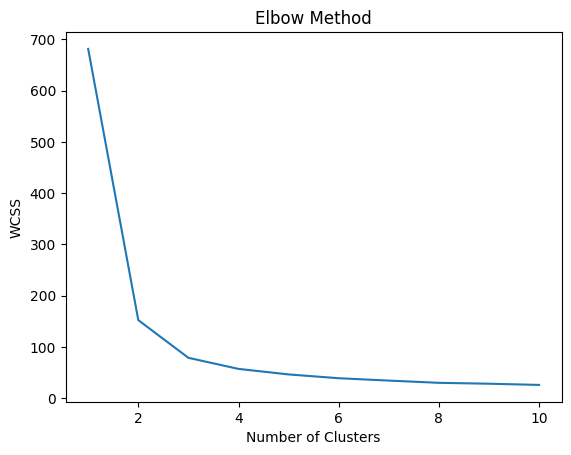

In [41]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data.data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [42]:
# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data.data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


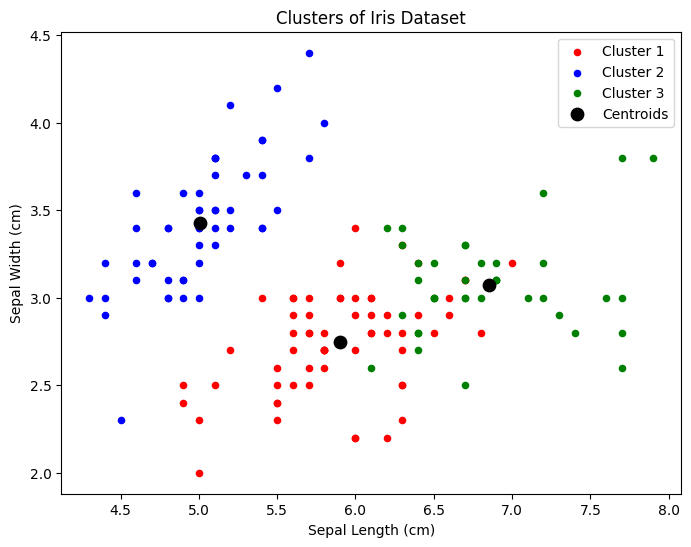

In [43]:
X = data.data

# Plot the results
plt.figure(figsize=(8, 6))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, c="green", label="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c="black", label="Centroids")
plt.title("Clusters of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()